,name,gender,origin,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,Male,Europe,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,Male,Asia,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,Male,South America,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,Male,North America,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,Female,North America,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,Female,North America,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,Female,Africa,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,Male,Oceania,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,Female,Africa,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,Male,South America,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


ColumnName, DataType, MissingValues
name , object , False
gender , object , False
origin , object , False
hair , int64 , False
feathers , int64 , False
eggs , int64 , False
milk , int64 , False
airborne , int64 , False
aquatic , int64 , False
predator , int64 , False
toothed , int64 , False
backbone , int64 , False
breathes , int64 , False
venomous , int64 , False
fins , int64 , False
legs , int64 , False
tail , int64 , False
domestic , int64 , False
catsize , int64 , False
type , int64 , False


,gender,origin,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,Male,Europe,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,Male,Asia,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,Male,South America,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,Male,North America,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,Female,North America,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,Female,North America,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,Female,Africa,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,Male,Oceania,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,Female,Africa,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,Male,South America,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


Column Datatypes:
 gender      object
origin      object
hair         int64
feathers     int64
eggs         int64
milk         int64
airborne     int64
aquatic      int64
predator     int64
toothed      int64
backbone     int64
breathes     int64
venomous     int64
fins         int64
legs         int64
tail         int64
domestic     int64
catsize      int64
type         int64
dtype: object


'Data Example:'

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,gender_Female,gender_Male,origin_Africa,origin_Asia,origin_Europe,origin_North America,origin_Oceania,origin_South America
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,0,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,0,1,0,1,0,0,0,0
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,0,1,0,0,0,0,0,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,0,1,0,0,0,1,0,0
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1,0,0,0,0,1,0,0
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1,0,0,0,0,1,0,0
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1,1,0,1,0,0,0,0,0
7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4,0,1,0,0,0,0,1,0
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,1,0,1,0,0,0,0,0
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1,0,1,0,0,0,0,0,1


Selected numerical columns:
 ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,gender_Female,gender_Male,origin_Africa,origin_Asia,origin_Europe,origin_North America,origin_Oceania,origin_South America
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0,0,1,0,0,1,0,0,0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0,0,1,0,1,0,0,0,0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,1
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0,0,1,0,0,0,1,0,0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0,1,0,0,0,0,1,0,0
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0,1,0,0,0,0,1,0,0
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,1.0,1.0,1,0,1,0,0,0,0,0
7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0,1,0,0,0,0,1,0
8,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0,1,0,0,0,0,0
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,1.0,0.0,0,1,0,0,0,0,0,1


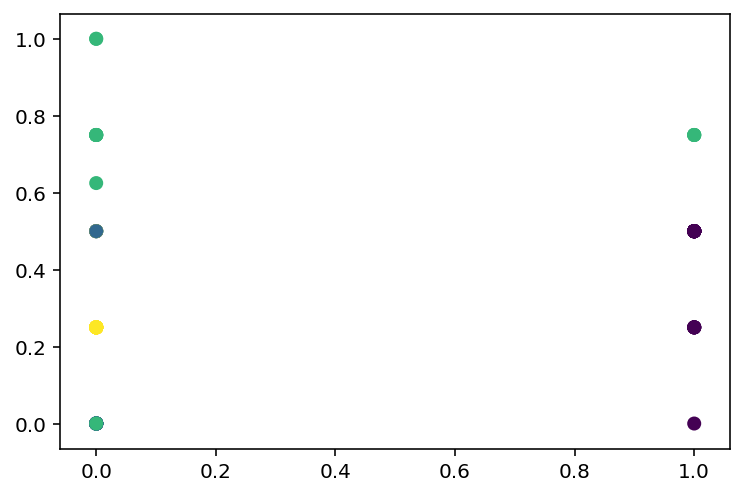

In [5]:
# 02. K-Means Clustering #############################################
# Requirements: numerical and normalized features

import numpy as np
import scipy as sp
import pandas as pd
from IPython.display import display, HTML
%matplotlib inline

df=pd.read_csv('W11_zoo.csv')
cols=df.columns
# print out and display dataframe as tables in HTML
display(HTML(df.head(10).to_html()))

# check  if there are missing values
print('ColumnName, DataType, MissingValues')
for i in cols:
    print(i, ',', df[i].dtype,',',df[i].isnull().any())

    
#drop column "name"
df=df.drop('name',1)

# print out and display dataframe as tables in HTML
display(HTML(df.head(10).to_html()))


# Data preprocessing ##############################################################################

print('Column Datatypes:\n',df.dtypes)

# convert all nominal variables to binary variables
df_raw=df.copy(deep=True) 
df_knn=df.copy(deep=True) 

# create new binary columns
df_dummies=pd.get_dummies(df_knn[['gender','origin']])

# add them to dataframe
df_knn=df_knn.join(df_dummies)
# drop original columns
df_knn=df_knn.drop('gender',axis=1)
df_knn=df_knn.drop('origin', axis=1)

display('Data Example:',HTML(df_knn.head(10).to_html()))

# Normalized all numerical features
# find numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cols_numeric = df_knn.select_dtypes(include=numerics).columns.tolist()
print('Selected numerical columns:\n',cols_numeric)    

# min-max normalization to scale [0, 1]
for col in cols_numeric:
    df_knn[col]=(df_knn[col]-df_knn[col].min())/(df_knn[col].max()-df_knn[col].min())


# We ignore the label column
df_kmeans=df_knn.drop('type',axis=1)
display(HTML(df_kmeans.head(10).to_html()))

# KMeans clustering ####################################################################
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
%config InlineBackend.figure_format = 'retina'

kmeans=KMeans(n_clusters=4, random_state=1)
kmeans.fit(df_kmeans)
y_pred=kmeans.predict(df_kmeans)

plt.scatter(df_kmeans['hair'],df_kmeans['legs'],c=y_pred,cmap='viridis')
plt.show()